In [1]:
# import necessary libraries

# File read and EDA(Data Cleansing & Transformations)
import numpy as np  
import pandas as pd 

# EDA Visualization
import matplotlib.pyplot as plt
import seaborn as sns

D:\anaocnda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\anaocnda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
D:\anaocnda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
mc_data = pd.read_json('modcloth_final_data.json', lines=True)
mc_data.head() # displays first 5 records in the dataframe

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


The format of columns'name is not standardized. For instance, 'cup size' and user_id are different. One separated by spaces and one underlined.

In [3]:
mc_data.columns = ['item_id', 'waist', 'mc_size', 'quality', 'cup_size', 'hips', 'bra_size', 'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id', 'shoe_size', 'shoe_width', 'review_summary', 'review_test']

In [4]:
mc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   mc_size         82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup_size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra_size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe_size       27915 non-null  float64
 15  shoe_width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_test     76065 non-null  obje

### check how many data missing in the modcloth_final_data.json
lets check the missing values percentage for each feature


In [5]:
missing_data_sum = mc_data.isnull().sum()
missing_data = pd.DataFrame({'total_missing_values': missing_data_sum,'percentage_of_missing_values': (missing_data_sum/mc_data.shape[0])*100})
missing_data

,total_missing_values,percentage_of_missing_values
item_id,0,0.000000
waist,79908,96.518903
mc_size,0,0.000000
quality,68,0.082136
cup_size,6255,7.555260
hips,26726,32.281677
bra_size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,1107,1.337118


In [6]:
mc_data.dtypes

item_id             int64
waist             float64
mc_size             int64
quality           float64
cup_size           object
hips              float64
bra_size          float64
category           object
bust               object
height             object
user_name          object
length             object
fit                object
user_id             int64
shoe_size         float64
shoe_width         object
review_summary     object
review_test        object
dtype: object

In [7]:
def countplot(indipendent_features):
  plt.figure(figsize=(25, 25))
  for loc, feature in enumerate(indipendent_features):
    ax = plt.subplot(3, 4, loc+1)
    ax.set_xlabel('{}'.format(feature), fontsize=10)
    chart = sns.countplot(mc_data[feature])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  return None

## Data visualization

D:\anaocnda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaocnda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaocnda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaocnda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

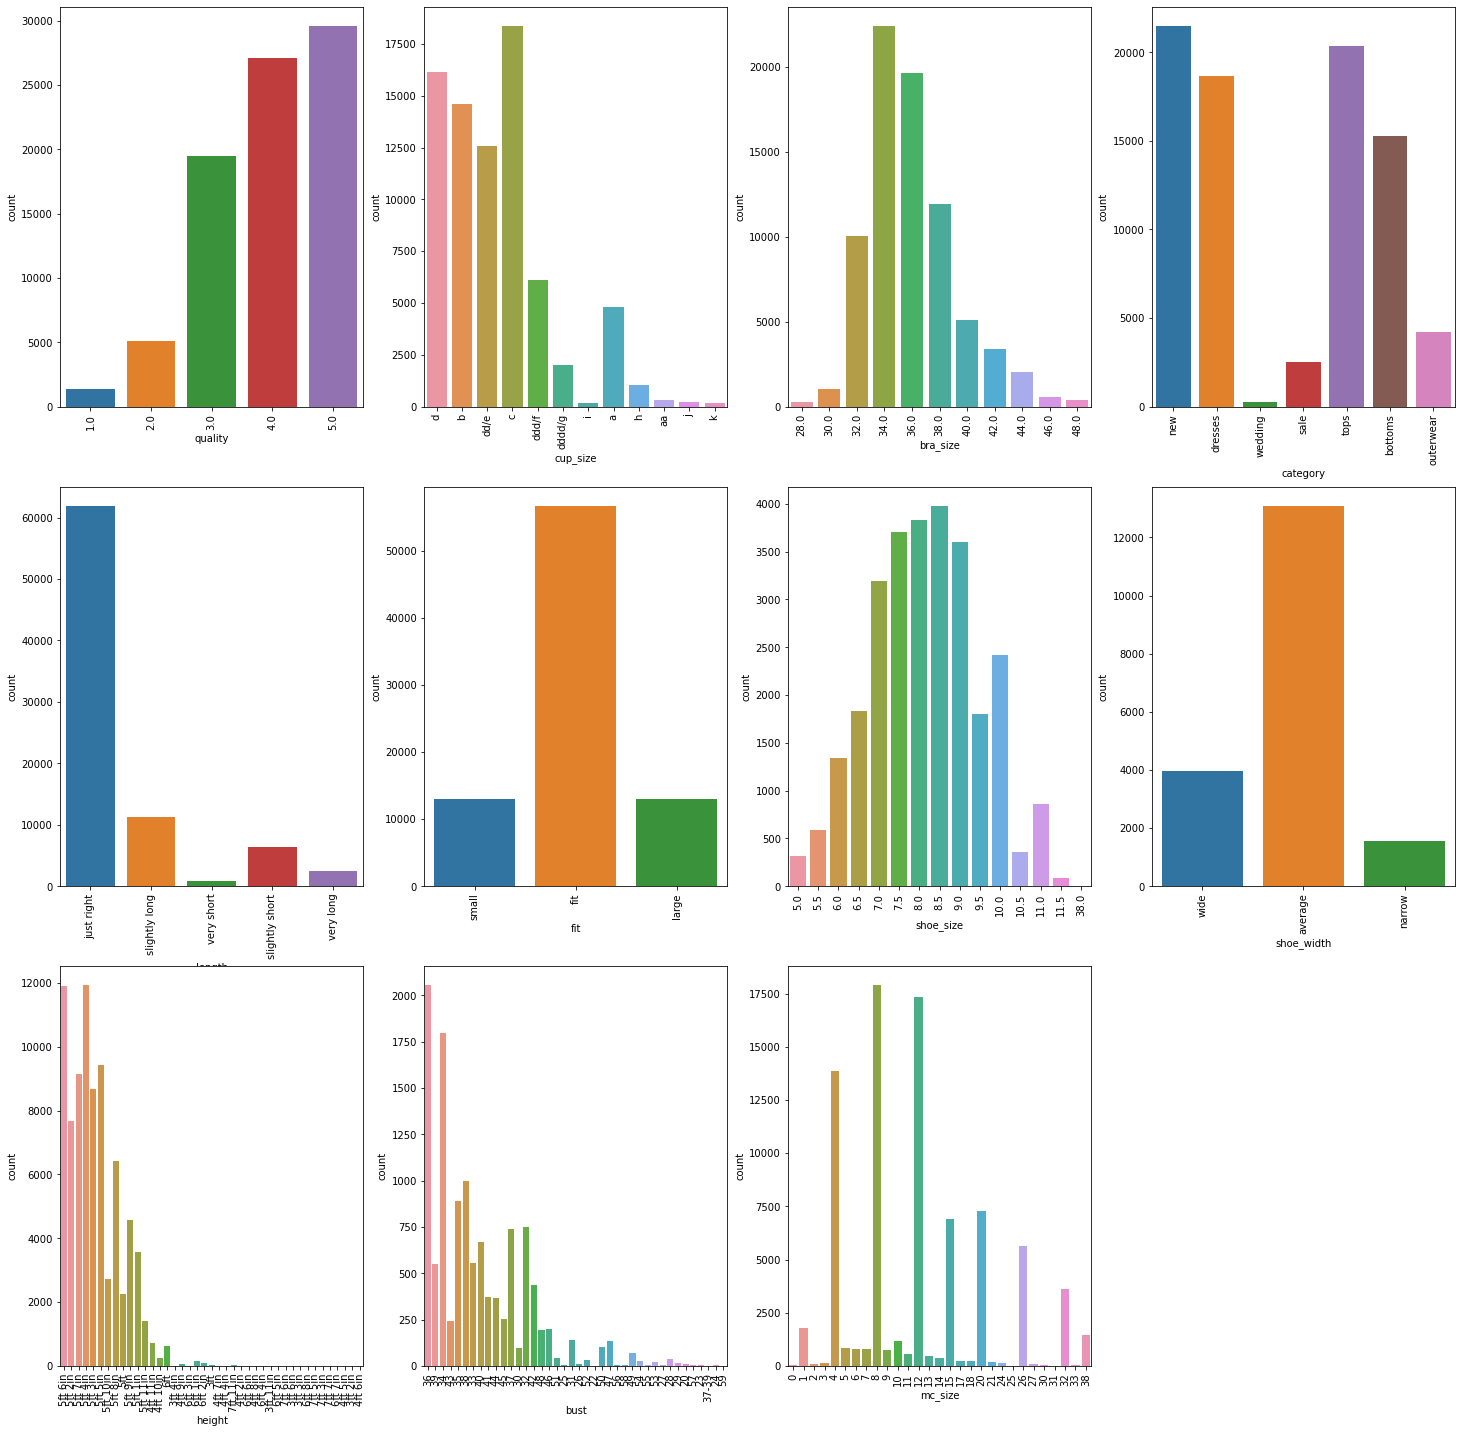

In [8]:
uniques_data = ['quality', 'cup_size', 'bra_size', 'category', 'length', 'fit',  'shoe_size', 'shoe_width', 'height', 'bust', 'mc_size']
countplot(uniques_data)

According to observations
* bust --> there is a format 37-39. In order to format the bust, we can replace the value with mean.
* height --> having few outliers
* catogorical data--> such as fit, shoe_width, length and category

In [9]:
# replacing bust unformatted value with mean 38 which is taken from the values 37 & 39 
mc_data.at[mc_data[mc_data.bust == '37-39'].index[0],'bust'] = '38'

In [10]:
def height_in_cms(ht):
  if ht.lower() != 'nan':
    ht = ht.replace('ft','').replace('in', '')
    h_ft = int(ht.split()[0])
    if len(ht.split()) > 1:
      h_inch = int(ht.split()[1])
    else:
      h_inch = 0
    h_inch += h_ft * 12
    h_cm = round(h_inch * 2.54, 1)
    return h_cm

mc_data.height = mc_data.height.astype(str).apply(height_in_cms)
mc_data.head()

,item_id,waist,mc_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_test
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,167.6,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,157.5,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,170.2,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,157.5,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


## Height feature -- Convert US units to Metric units (ft & in to cm).

In [15]:
mc_data.height.fillna(value=mc_data.height.mean(), inplace=True)
mc_data.height.isnull().sum()

C:\Users\FRANKL~1\AppData\Local\Temp/ipykernel_4776/3033358286.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mc_data.height.fillna(value=mc_data.height.mean(), inplace=True)


0

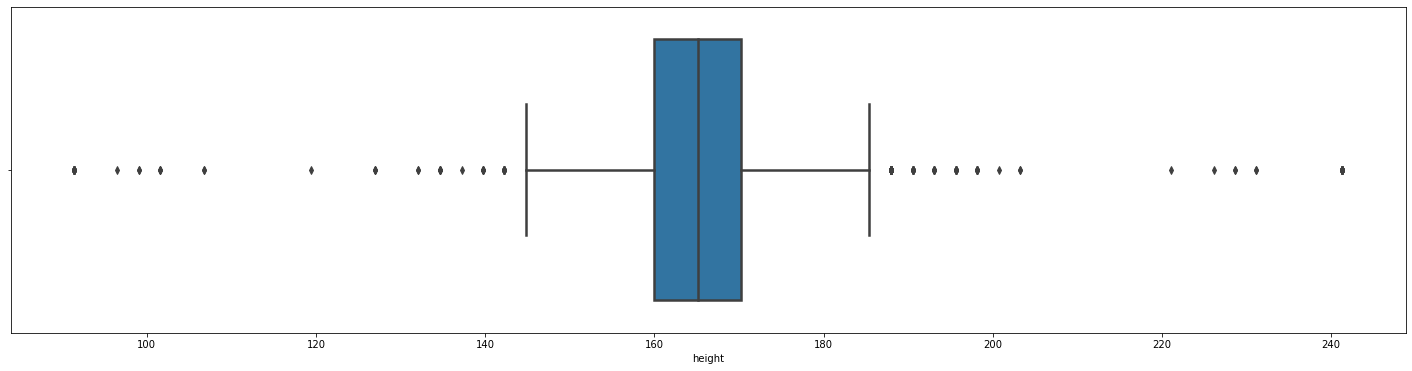

In [16]:
def plot_outlier(feature):
  plt.figure(figsize=(25, 6))
  ax = sns.boxplot(x=feature, linewidth=2.5)
plot_outlier(mc_data.height)

In [17]:
def get_outliers_range(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn , [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [18]:
ht_lower_range,ht_upper_range = get_outliers_range(mc_data.height)
ht_lower_range,ht_upper_range

(144.70000000000002, 185.49999999999997)

### count how many outliers exists for this height feature

In [19]:
mc_data[(mc_data.height < ht_lower_range) | (mc_data.height > ht_upper_range)]

,item_id,waist,mc_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_test
468,125442,NaN,5,5.0,c,35.0,34.0,new,NaN,101.6,sarah.d.charleton,just right,fit,536627,NaN,NaN,NaN,NaN
1895,129268,NaN,20,3.0,NaN,NaN,NaN,new,NaN,190.5,fran4252,slightly short,small,768980,NaN,NaN,NaN,NaN
1952,129268,NaN,26,5.0,d,49.0,40.0,new,45,188.0,folkloregray,slightly long,fit,463032,10.5,average,NaN,NaN
2919,136482,NaN,32,4.0,ddd/f,46.0,40.0,new,NaN,188.0,krobinson2011,just right,fit,372482,NaN,NaN,NaN,NaN
3223,137865,NaN,26,4.0,h,47.0,36.0,new,NaN,188.0,Leila,just right,fit,527524,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80344,792842,NaN,12,4.0,k,60.0,48.0,outerwear,NaN,241.3,bandnerd2522,just right,small,810539,11.5,average,I need blazers to wear ov,I need blazers to wear over some of my dresses...
80713,796383,NaN,12,4.0,k,60.0,48.0,outerwear,NaN,241.3,bandnerd2522,just right,small,810539,11.5,average,"This jacket is lovely, bu","This jacket is lovely, but I couldn't move my ..."
81083,803464,NaN,4,5.0,NaN,NaN,NaN,outerwear,NaN,241.3,Ida,just right,fit,887787,NaN,NaN,Finally a blazer that fit,Finally a blazer that fits me perfectly and do...
81846,806479,NaN,15,5.0,c,40.0,34.0,outerwear,NaN,188.0,brittanna75,slightly long,large,910471,9.5,average,I am very happy with this,I am very happy with this coat. It will be a ...


In [20]:
mc_df = mc_data.drop(mc_data[(mc_data.height < ht_lower_range) | (mc_data.height > ht_upper_range)].index)

mc_df.reset_index(drop=True, inplace=True)
mc_df.shape

(82591, 18)

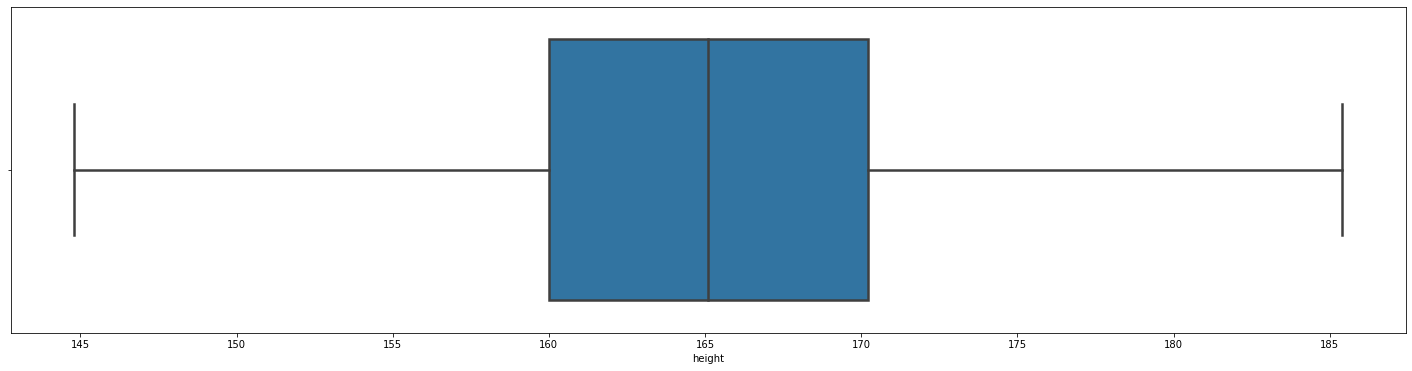

In [28]:
plot_outlier(mc_df.height)

 ## Missing Values Handling for numeric features

In [58]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)

# finding imputation using other features (it will take couple of minutes to complete the execution)
mc_data_knn_ind_features = mc_df[['waist', 'hips', 'bra_size', 'bust', 'height', 'shoe_size']]

df_filled = imputer.fit_transform(mc_data_knn_ind_features)


knn_numeric_imputations = pd.DataFrame(data=df_filled, columns=['waist', 'hips', 'bra_size', 'bust', 'height', 'shoe_size'])


# remove the existing numeric columns (waist, height, hips, bra_size, bust, shoe_size ) from the main dataframe and concatenate  with knn imputed data
#mc_df = mc_data
mc_new_df = mc_df.drop(['waist', 'hips', 'bra_size', 'bust', 'height', 'shoe_size'], axis=1)

In [59]:
# concat the imputations data with mc data frame
mc = pd.concat([mc_new_df, knn_numeric_imputations], axis=1)
mc.isnull().sum()

item_id               0
mc_size               0
quality              68
cup_size           6231
category              0
user_name             0
length               35
fit                   0
user_id               0
shoe_width        64023
review_summary     6710
review_test        6710
waist                 0
hips                  0
bra_size              0
bust                  0
height                0
shoe_size             0
dtype: int64

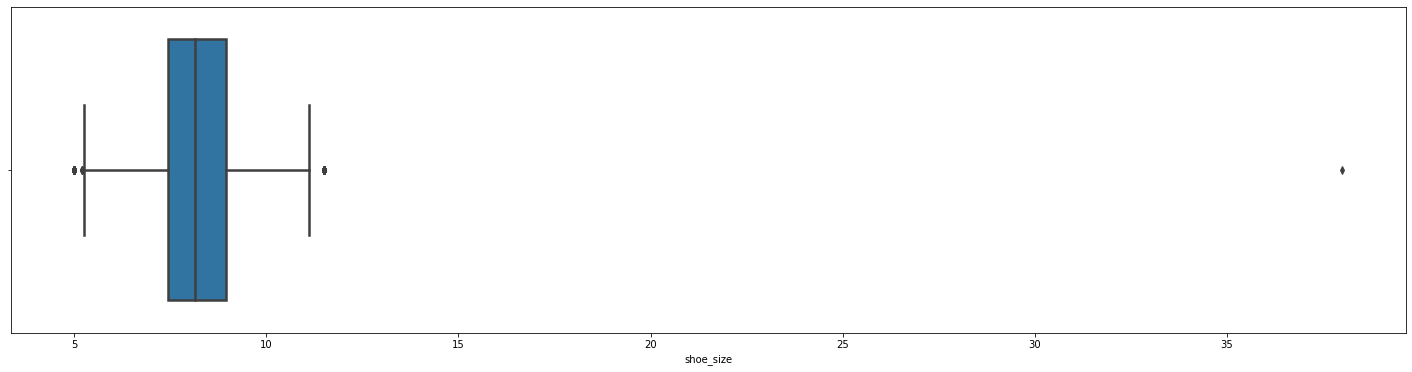

In [60]:
plot_outlier(mc.shoe_size)

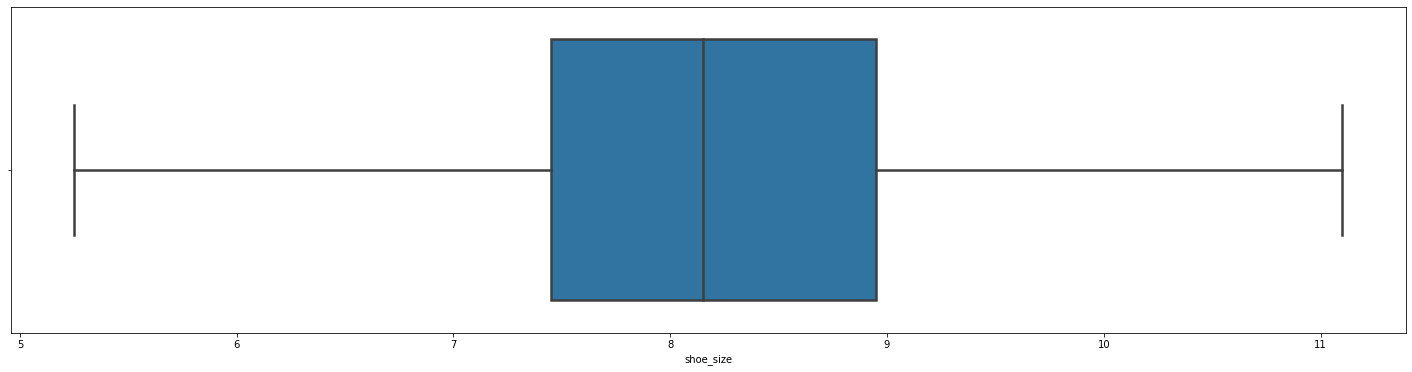

In [61]:
ss_lower_range,ss_upper_range = get_outliers_range(mc.shoe_size)
#print(ss_lower_range,ss_upper_range)

mc.drop(mc[(mc.shoe_size < ss_lower_range) | (mc.shoe_size > ss_upper_range)].index, axis=0, inplace=True) # found 390 observations 
plot_outlier(mc.shoe_size)

## Transform some of categorical variables to numeric

In [62]:
def convert_cup_size_to_cms(cup_size_code):
  if cup_size_code == 'aa':
    return 10, 11
  if cup_size_code == 'a':
    return 12, 13
  if cup_size_code == 'b':
    return 14, 15
  if cup_size_code == 'c':
    return 16, 17
  if cup_size_code == 'd':
    return 18, 19
  if cup_size_code == 'dd/e':
    return 20, 21
  if cup_size_code == 'ddd/f':
    return 22, 23
  if cup_size_code == 'dddd/g':
    return 24, 25
  if cup_size_code == 'h':
    return 26, 27
  if cup_size_code == 'i':
    return 28, 29
  if cup_size_code == 'j':
    return 30, 31
  if cup_size_code == 'k':
    return 32, 33 
  else:
    return str('unknown')

In [63]:
mc['cup_size_in_cms'] = mc.cup_size.apply(convert_cup_size_to_cms)
mc.head()

,item_id,mc_size,quality,cup_size,category,user_name,length,fit,user_id,shoe_width,review_summary,review_test,waist,hips,bra_size,bust,height,shoe_size,cup_size_in_cms
0,123373,7,5.0,d,new,Emily,just right,small,991571,NaN,NaN,NaN,29.0,38.0,34.0,36.0,167.600000,7.75,"(18, 19)"
1,123373,13,3.0,b,new,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,31.0,30.0,36.0,37.8,157.500000,7.25,"(14, 15)"
2,123373,7,2.0,b,new,Ugggh,slightly long,small,395665,NaN,NaN,NaN,30.0,35.9,32.0,32.9,170.200000,9.00,"(14, 15)"
3,123373,21,5.0,dd/e,new,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,30.4,41.7,38.6,40.3,165.472612,8.40,"(20, 21)"
4,123373,18,5.0,b,new,dberrones1,slightly long,small,944840,NaN,NaN,NaN,31.1,39.2,36.0,37.4,157.500000,7.40,"(14, 15)"


In [64]:
def split_cup_size_data(data, index):
  if data.lower() == 'unknown':
    return 0
  value = data.replace('(','').replace(')','').replace(',','')
  return value.split()[index]

mc['cup_size_start_in_cms'] =  mc.cup_size_in_cms.astype(str).apply(lambda x : split_cup_size_data(x, 0))
mc['cup_size_end_in_cms'] =  mc.cup_size_in_cms.astype(str).apply(lambda x : split_cup_size_data(x, 1))
mc.head()

,item_id,mc_size,quality,cup_size,category,user_name,length,fit,user_id,shoe_width,...,review_test,waist,hips,bra_size,bust,height,shoe_size,cup_size_in_cms,cup_size_start_in_cms,cup_size_end_in_cms
0,123373,7,5.0,d,new,Emily,just right,small,991571,NaN,...,NaN,29.0,38.0,34.0,36.0,167.600000,7.75,"(18, 19)",18,19
1,123373,13,3.0,b,new,sydneybraden2001,just right,small,587883,NaN,...,NaN,31.0,30.0,36.0,37.8,157.500000,7.25,"(14, 15)",14,15
2,123373,7,2.0,b,new,Ugggh,slightly long,small,395665,NaN,...,NaN,30.0,35.9,32.0,32.9,170.200000,9.00,"(14, 15)",14,15
3,123373,21,5.0,dd/e,new,alexmeyer626,just right,fit,875643,NaN,...,NaN,30.4,41.7,38.6,40.3,165.472612,8.40,"(20, 21)",20,21
4,123373,18,5.0,b,new,dberrones1,slightly long,small,944840,NaN,...,NaN,31.1,39.2,36.0,37.4,157.500000,7.40,"(14, 15)",14,15


In [65]:
mc['cup_size_start_in_cms'] = mc.cup_size_start_in_cms.astype('int')
mc['cup_size_end_in_cms'] = mc.cup_size_end_in_cms.astype('int')


# missing values imputation with mean
mc['cup_size_start_in_cms']  = mc.cup_size_start_in_cms.mask(mc.cup_size_start_in_cms==0).fillna(value=mc.cup_size_start_in_cms.mean())
mc['cup_size_end_in_cms']  = mc.cup_size_end_in_cms.mask(mc.cup_size_end_in_cms==0).fillna(value=mc.cup_size_end_in_cms.mean())

In [66]:
mc[mc.cup_size.isnull()]

,item_id,mc_size,quality,cup_size,category,user_name,length,fit,user_id,shoe_width,...,review_test,waist,hips,bra_size,bust,height,shoe_size,cup_size_in_cms,cup_size_start_in_cms,cup_size_end_in_cms
61,124024,9,5.0,NaN,new,cdpase,just right,fit,277450,NaN,...,NaN,30.0,37.7,34.4,36.8,160.0,7.20,unknown,16.041532,16.965888
70,124124,26,5.0,NaN,new,inevitable.cities,slightly long,fit,29730,NaN,...,NaN,34.2,40.0,37.6,35.4,175.3,10.10,unknown,16.041532,16.965888
72,124124,26,3.0,NaN,new,Josephine,slightly short,fit,497767,NaN,...,NaN,34.2,40.0,37.6,35.4,175.3,10.10,unknown,16.041532,16.965888
99,124124,12,1.0,NaN,new,christine.koch,very short,small,435872,NaN,...,NaN,32.7,46.5,35.2,38.0,170.2,8.80,unknown,16.041532,16.965888
101,124124,15,4.0,NaN,new,meghanmurphy,just right,small,788667,NaN,...,NaN,31.0,39.8,34.4,36.0,157.5,6.90,unknown,16.041532,16.965888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82525,807384,8,3.0,NaN,outerwear,streamlineblue,just right,fit,336703,NaN,...,This coat is awesome! Fit/length/color/style i...,30.6,38.5,35.6,35.7,162.6,7.85,unknown,16.041532,16.965888
82562,807722,4,5.0,NaN,outerwear,melissalehtonen,just right,fit,357068,NaN,...,Love it!!!!! P,31.0,39.8,34.4,36.0,157.5,6.90,unknown,16.041532,16.965888
82565,807722,4,5.0,NaN,outerwear,Hufsa,just right,fit,475911,NaN,...,Perfect for work dresses.,30.0,37.7,34.4,36.8,160.0,7.20,unknown,16.041532,16.965888
82578,807722,8,4.0,NaN,outerwear,spoons_82,just right,small,236365,NaN,...,Had to return I'm usually a medium in shirts ...,29.3,38.0,34.0,37.7,162.6,7.80,unknown,16.041532,16.965888


In [67]:
# drop the columns which are used for reference
mc = mc.drop(['cup_size', 'cup_size_in_cms'], axis = 1)
mc.reset_index(drop=True,  inplace=True)

## Categorical data to Numeric using one-hot encoding

In [68]:
def countplot_wrt_target(indipendent_features, df):
  plt.figure(figsize=(28, 10))
  for loc, feature in enumerate(indipendent_features):
    ax = plt.subplot(1, 3, loc+1)
    ax.set_xlabel('{}'.format(feature), fontsize=10)
    chart = sns.countplot(x=df[feature], hue=df.fit)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  return None

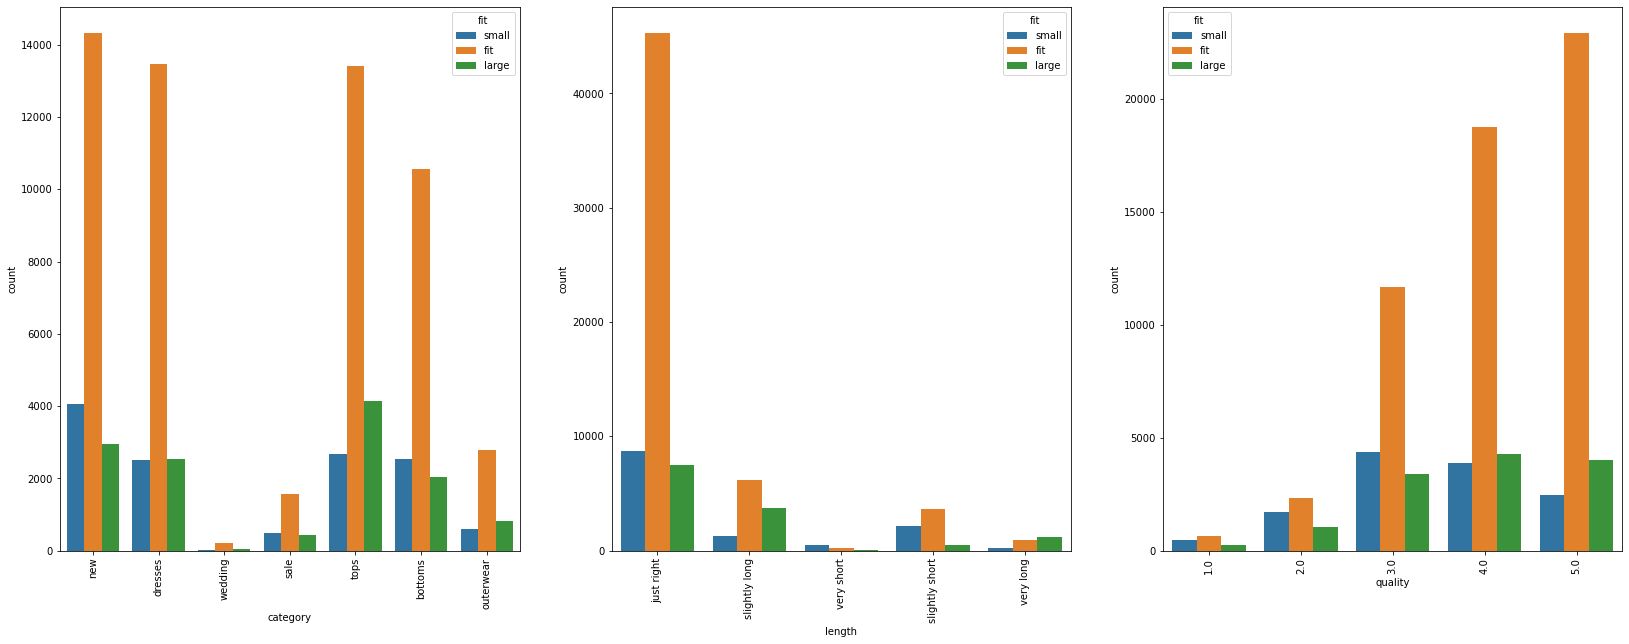

In [69]:
countplot_wrt_target(['category', 'length', 'quality'], mc)

In [70]:
mc.shoe_width = mc.shoe_width.fillna('average')

In [71]:
# Use above chart to convert shoe width data such as 'wide','average','narrow' to inches
mc['shoe_width_in_inches'] = np.where(((mc.shoe_size >= 5) & (mc.shoe_size < 5.5)) & (mc.shoe_width == 'narrow') , 2.81, 
np.where(((mc.shoe_size >= 5) & (mc.shoe_size < 5.5)) & (mc.shoe_width == 'average') , 3.19, 
np.where(((mc.shoe_size >= 5) & (mc.shoe_size < 5.5)) & (mc.shoe_width == 'wide') , 3.56,
np.where(((mc.shoe_size >= 5.5) & (mc.shoe_size < 6)) & (mc.shoe_width == 'narrow') , 2.87, 
np.where(((mc.shoe_size >= 5.5) & (mc.shoe_size < 6)) & (mc.shoe_width == 'average') , 3.25, 
np.where(((mc.shoe_size >= 5.5) & (mc.shoe_size < 6)) & (mc.shoe_width == 'wide') , 3.62, 
np.where(((mc.shoe_size >= 6) & (mc.shoe_size < 6.5)) & (mc.shoe_width == 'narrow') , 2.94, 
np.where(((mc.shoe_size >= 6) & (mc.shoe_size < 6.5)) & (mc.shoe_width == 'average') , 3.31, 
np.where(((mc.shoe_size >= 6) & (mc.shoe_size < 6.5)) & (mc.shoe_width == 'wide') , 3.69,
np.where(((mc.shoe_size >= 6.5) & (mc.shoe_size < 7)) & (mc.shoe_width == 'narrow') , 3, 
np.where(((mc.shoe_size >= 6.5) & (mc.shoe_size < 7)) & (mc.shoe_width == 'average') , 3.37, 
np.where(((mc.shoe_size >= 6.5) & (mc.shoe_size < 7)) & (mc.shoe_width == 'wide') , 3.75,
np.where(((mc.shoe_size >= 7) & (mc.shoe_size < 7.5)) & (mc.shoe_width == 'narrow') , 3.06, 
np.where(((mc.shoe_size >= 7) & (mc.shoe_size < 7.5)) & (mc.shoe_width == 'average') , 3.44, 
np.where(((mc.shoe_size >= 7) & (mc.shoe_size < 7.5)) & (mc.shoe_width == 'wide') , 3.81, 
np.where(((mc.shoe_size >= 7.5) & (mc.shoe_size < 8)) & (mc.shoe_width == 'narrow') , 3.12, 
np.where(((mc.shoe_size >= 7.5) & (mc.shoe_size < 8)) & (mc.shoe_width == 'average') , 3.5, 
np.where(((mc.shoe_size >= 7.5) & (mc.shoe_size < 8)) & (mc.shoe_width == 'wide') , 3.87, 
np.where(((mc.shoe_size >= 8) & (mc.shoe_size < 8.5)) & (mc.shoe_width == 'narrow') , 3.19, 
np.where(((mc.shoe_size >= 8) & (mc.shoe_size < 8.5)) & (mc.shoe_width == 'average') , 3.56, 
np.where(((mc.shoe_size >= 8) & (mc.shoe_size < 8.5)) & (mc.shoe_width == 'wide') , 3.94, 
np.where(((mc.shoe_size >= 8.5) & (mc.shoe_size < 9)) & (mc.shoe_width == 'narrow') , 3.25, 
np.where(((mc.shoe_size >= 8.5) & (mc.shoe_size < 9)) & (mc.shoe_width == 'average') , 3.62, 
np.where(((mc.shoe_size >= 8.5) & (mc.shoe_size < 9)) & (mc.shoe_width == 'wide') , 4, 
np.where(((mc.shoe_size >= 9) & (mc.shoe_size < 9.5)) & (mc.shoe_width == 'narrow') , 3.37, 
np.where(((mc.shoe_size >= 9) & (mc.shoe_size < 9.5)) & (mc.shoe_width == 'average') , 3.69, 
np.where(((mc.shoe_size >= 9) & (mc.shoe_size < 9.5)) & (mc.shoe_width == 'wide') , 4.06, 
np.where(((mc.shoe_size >= 9.5) & (mc.shoe_size < 10)) & (mc.shoe_width == 'narrow') , 3.37, 
np.where(((mc.shoe_size >= 9.5) & (mc.shoe_size < 10)) & (mc.shoe_width == 'average') , 3.75, 
np.where(((mc.shoe_size >= 9.5) & (mc.shoe_size < 10)) & (mc.shoe_width == 'wide') , 4.12, 
np.where(((mc.shoe_size >= 10) & (mc.shoe_size < 10.5)) & (mc.shoe_width == 'narrow') , 3.44, 
np.where(((mc.shoe_size >= 10) & (mc.shoe_size < 10.5)) & (mc.shoe_width == 'average') , 3.75, 
np.where(((mc.shoe_size >= 10) & (mc.shoe_size < 10.5)) & (mc.shoe_width == 'wide') , 4.19, 
np.where(((mc.shoe_size >= 10.5) & (mc.shoe_size < 11)) & (mc.shoe_width == 'narrow') , 3.5, 
np.where(((mc.shoe_size >= 10.5) & (mc.shoe_size < 11)) & (mc.shoe_width == 'average') , 3.87, 
np.where(((mc.shoe_size >= 10.5) & (mc.shoe_size < 11)) & (mc.shoe_width == 'wide') , 4.19, 
np.where(((mc.shoe_size >= 11) & (mc.shoe_size < 12)) & (mc.shoe_width == 'narrow') , 3.56, 
np.where(((mc.shoe_size >= 11) & (mc.shoe_size < 12)) & (mc.shoe_width == 'average') , 3.94, 
np.where(((mc.shoe_size >= 11) & (mc.shoe_size < 12)) & (mc.shoe_width == 'wide') , 4.19,
np.nan)))))))))))))))))))))))))))))))))))))))

In [72]:
# drop the refrence colum shoe_width
mc.drop(['shoe_width'], axis=1, inplace=True)

## Applied one-hot encoding for the features length & category

In [73]:
mc.length = mc.length.fillna('unknown')

# apply one hot encoding using dummies

length_dummies  = pd.get_dummies(mc['length'])
length_dummies.columns = ['just_right','slightly_long','very_short','slightly_short','very_long', 'length_unkown']

category_dummies  = pd.get_dummies(mc['category'])
category_dummies.columns = ['new','dresses','wedding','sale','tops', 'bottoms','outerwear']

model_input_df = pd.concat([mc, length_dummies,category_dummies], axis = 1)
model_input_df.drop(['length'], axis=1, inplace=True)
model_input_df.drop(['category'], axis=1, inplace=True)

# target variable 
fit = {'small':0, 'fit':1, 'large':2}
model_input_df['fit'] = model_input_df['fit'].map(fit)

In [74]:
# since there is no value add to the features like item_id , user_id and user_name

model_input_df.drop(['item_id'], axis=1, inplace=True)

model_input_df.drop(['user_id'], axis=1, inplace=True)

model_input_df.drop(['user_name'], axis=1, inplace=True)
model_input_df.head()

,mc_size,quality,fit,review_summary,review_test,waist,hips,bra_size,bust,height,...,slightly_short,very_long,length_unkown,new,dresses,wedding,sale,tops,bottoms,outerwear
0,7,5.0,0,NaN,NaN,29.0,38.0,34.0,36.0,167.600000,...,False,False,False,False,False,True,False,False,False,False
1,13,3.0,0,NaN,NaN,31.0,30.0,36.0,37.8,157.500000,...,False,False,False,False,False,True,False,False,False,False
2,7,2.0,0,NaN,NaN,30.0,35.9,32.0,32.9,170.200000,...,False,False,False,False,False,True,False,False,False,False
3,21,5.0,1,NaN,NaN,30.4,41.7,38.6,40.3,165.472612,...,False,False,False,False,False,True,False,False,False,False
4,18,5.0,0,NaN,NaN,31.1,39.2,36.0,37.4,157.500000,...,False,False,False,False,False,True,False,False,False,False


In [75]:
model_input_df.to_csv('model_input_data.csv', index=False)